## 빅데이터 실습

### 와인품질 등급 분석/예측
> 1. UC 어바인 머신러닝 연구소가 제공하는 모듈사용(`ucimlrepo` , `dotdict`)
> 2. `statsmodes` 라이브러리 분석 함수
>> - `OLS` : `Ordinary Least Square` -> 2승 모델로 분석을 하는 함수
>> - `GLM` : `Generalized Linear Model` -> 일반 선형모델로 분석 함수
>> - `GLS` : `Generalized Least Square` -> 2승 일반화된 최소 승수 모델(두가지로 표본집단을 나눠서)
>> - `WLS` : `Weighted Least Squre` -> 가중치를 부가한
---
- `fit()` : 훈련결과를 예측
- `predict()` : 결과를 예측 

In [1]:
# 필수 라이브러리/모듈 등록
import pandas as pd
from ucimlrepo import fetch_ucirepo  # 인터넷으로 통계 데이터를 다운로드할 함수
from scipy import stats  # 과학수치모듈 내의 기술통계 객체 사용
from statsmodels.formula.api import ols, glm  # 분석을 위한 결과를 도출해주는 함수들

In [2]:
# 와인 데이터 가져오기
wineQuality = fetch_ucirepo(id=186)

In [3]:
dfWineTotal = wineQuality.data.original

In [4]:
dfWineTotal.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### 회귀분석

In [5]:
# 회귀분석 변수로 회귀수식 작성
RFormula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [6]:
# 회귀분석
regrResult = ols(RFormula, data=dfWineTotal).fit()
regrResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:05:58   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
regrResult2 = glm(RFormula, data=dfWineTotal).fit()
regrResult2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 6497
Model:                            GLM   Df Residuals:                     6485
Model Family:                Gaussian   Df Model:                           11
Link Function:               Identity   Scale:                         0.54071
Method:                          IRLS   Log-Likelihood:                -7215.5
Date:                Thu, 21 Mar 2024   Deviance:                       3506.5
Time:                        12:05:58   Pearson chi2:                 3.51e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3376
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.451      79.074
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.756     -31.178
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
========================================================================================
"""

#### 도출된 회귀분석 결과로 새로운 와인샘플 품질등급 예측

In [8]:
# 와인 품질등급 예측용 샘플데이터
dfWineTotal.columns.difference(['quality', 'color'])

Index(['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity'],
      dtype='object')

In [9]:
sample1 = dfWineTotal[dfWineTotal.columns.difference(['quality', 'color'])]

In [10]:
sample1 = sample1[0:5]

In [11]:
# OLS 모델 예측시작
regrResult.predict(sample1)

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [12]:
# GLM 모델 예측
regrResult2.predict(sample1)

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

#### 결론 : 실제 데이터와 선형회귀 모델에서 예측한 결과과 거의 동일

In [13]:
# 현재 실제 데이터 중 와인 등급이 9인 것
condition = dfWineTotal['quality'] == 9
dfWineTotal[condition].describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.0
mean,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.18000,9.0
std,0.983362,0.057619,0.082037,3.759255,0.007436,13.427584,19.824228,0.003118,0.082885,0.092628,1.01341,0.0
min,6.600000,0.240000,0.290000,1.600000,0.018000,24.000000,85.000000,0.989650,3.200000,0.360000,10.40000,9.0
25%,6.900000,0.260000,0.340000,2.000000,0.021000,27.000000,113.000000,0.989800,3.280000,0.420000,12.40000,9.0
50%,7.100000,0.270000,0.360000,2.200000,0.031000,28.000000,119.000000,0.990300,3.280000,0.460000,12.50000,9.0
75%,7.400000,0.360000,0.450000,4.200000,0.032000,31.000000,124.000000,0.990550,3.370000,0.480000,12.70000,9.0
max,9.100000,0.360000,0.490000,10.600000,0.035000,57.000000,139.000000,0.997000,3.410000,0.610000,12.90000,9.0


In [14]:
# 더미데이터 생성(세번째 값은 와인품질 9등급 평균으로 만든 값)
data = {'fixed_acidity': [8.5, 8.1, 7.5], 'volatile_acidity': [0.8, 0.5, 0.3], 'citric_acid': [0.3, 0.4, 0.4],
        'residual_sugar': [6.12, 5.8, 5.0], 'chlorides': [0.055, 0.04, 0.027],
        'free_sulfur_dioxide': [30.0, 31.0, 33.4], 'total_sulfur_dioxide': [98.0, 99, 116],
        'density': [0.996, 0.91, 0.991], 'pH': [3.15, 3.01, 3.3], 'sulphates': [0.4, 0.35, 0.47],
        'alcohol': [9.0, 0.88, 12.2]}

In [15]:
sample2 = pd.DataFrame(data)
sample2

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,8.5,0.8,0.3,6.12,0.055,30.0,98.0,0.996,3.15,0.40,9.00
1,8.1,0.5,0.4,5.80,0.040,31.0,99.0,0.910,3.01,0.35,0.88
2,7.5,0.3,0.4,5.00,0.027,33.4,116.0,0.991,3.30,0.47,12.20


In [16]:
# 예측 시작(ols 모델)
regrResult.predict(sample2)

0    4.766036
1    7.582129
2    6.540728
dtype: float64

In [17]:
# 예측 시작(glm 모델)
regrResult2.predict(sample2)

0    4.766036
1    7.582129
2    6.540728
dtype: float64

#### 결과 시각화

In [18]:
# 시각화 라이브러리 등록
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # 선형회귀 시각화를 위한 객체

In [19]:
sns.set_style('darkgrid')

In [20]:
# 레드와인 품질
condition = dfWineTotal['color'] == 'red'
redWineQuality = dfWineTotal[condition]['quality']
redWineQuality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [21]:
# 화이트와인 품질
condition = dfWineTotal['color'] == 'white'
whiteWineQuality = dfWineTotal[condition]['quality']

In [22]:
redWineQuality.info()

<class 'pandas.core.series.Series'>
Index: 1599 entries, 0 to 1598
Series name: quality
Non-Null Count  Dtype
--------------  -----
1599 non-null   int64
dtypes: int64(1)
memory usage: 25.0 KB


In [23]:
whiteWineQuality.info()

<class 'pandas.core.series.Series'>
Index: 4898 entries, 1599 to 6496
Series name: quality
Non-Null Count  Dtype
--------------  -----
4898 non-null   int64
dtypes: int64(1)
memory usage: 76.5 KB


In [24]:
from matplotlib import rc

rc('font', family='D2Coding')

plt.rcParams['axes.unicode_minus'] = False

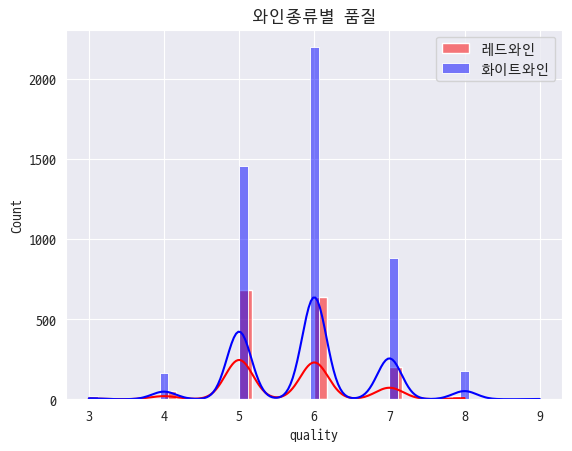

In [25]:
# distplot() : seaborn 0.14.0 에서 제거될 함수이다. -> displot() 또는 histplot() 추천
sns.histplot(redWineQuality, kde=True, color='red', label='레드와인')
sns.histplot(whiteWineQuality, kde=True, color='blue', label='화이트와인')

plt.title('와인종류별 품질')
plt.legend()
plt.show()

In [26]:
others = list(set(dfWineTotal.columns).difference(set['quality', 'fixed_acidity'])) # 차집합

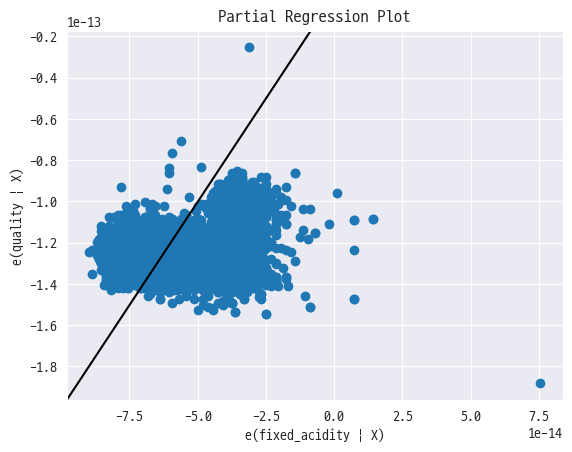

In [27]:
# fixed_acidity(고정산)에 대한 quality(품질)의 상관관계를 선형 
sm.graphics.plot_partregress(exog_i='fixed_acidity',endog='quality',exog_others= others, data=dfWineTotal, obs_labels=False)

plt.show()

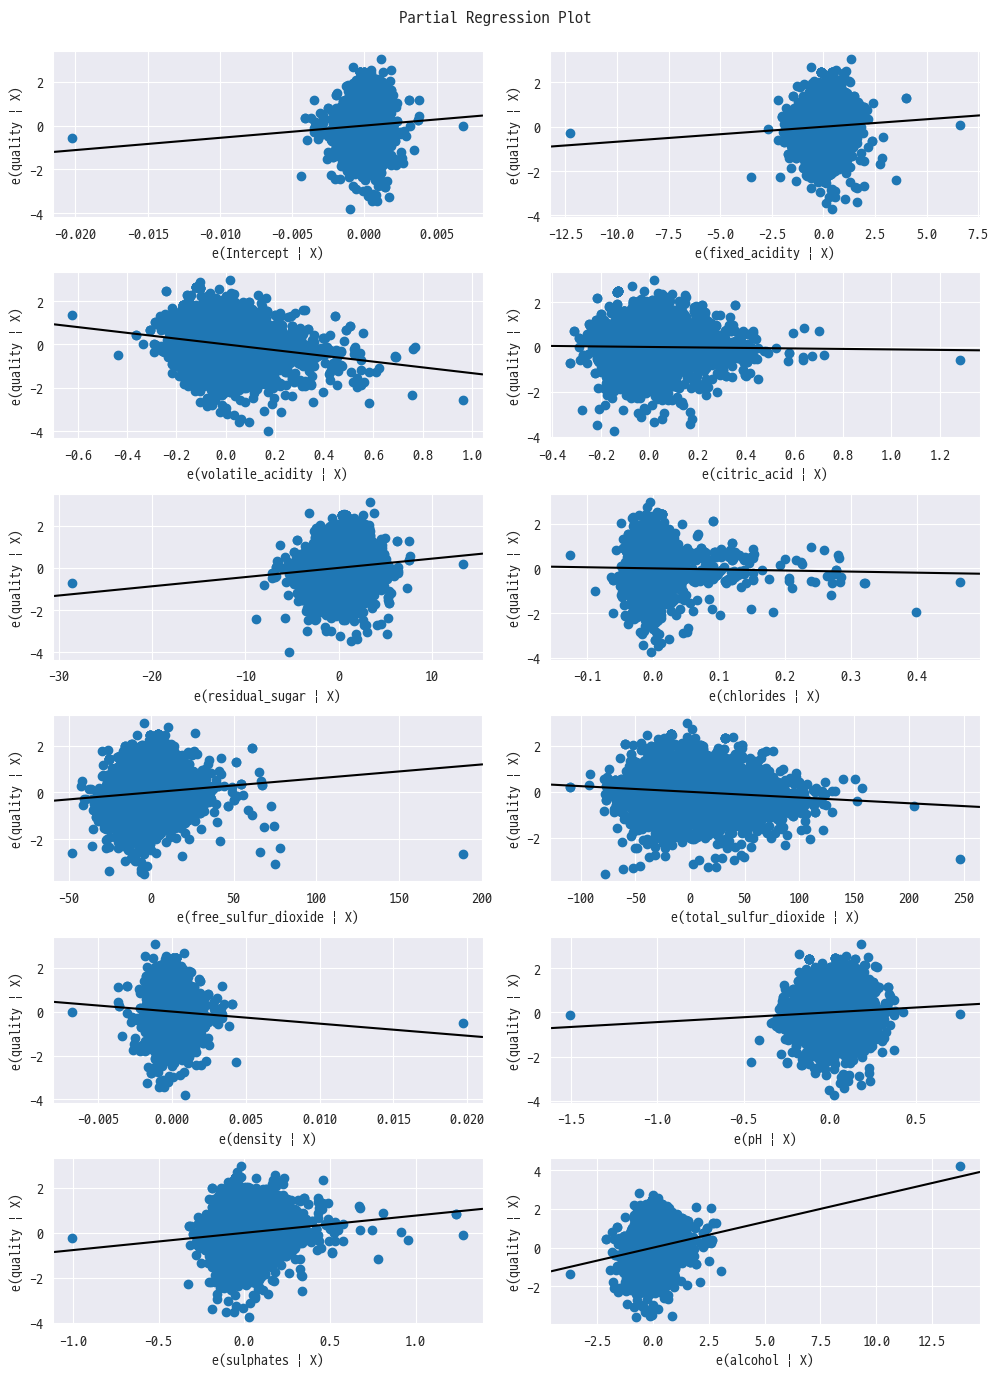

In [28]:
# 선형회귀 결과로 시각화
fig = plt.figure(figsize=(10,14))
sm.graphics.plot_partregress_grid(regrResult, fig=fig)

plt.show()

In [29]:
dfWineTotal[['alcohol', 'quality']].tail()

,alcohol,quality
6492,11.2,6
6493,9.6,5
6494,9.4,6
6495,12.8,7
6496,11.8,6
